In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nadia = cv2.imread('Computer-Vision-with-Python/DATA/Nadia_Murad.jpg', 0)
denis = cv2.imread('Computer-Vision-with-Python/DATA/Denis_Mukwege.jpg', 0)
solvay = cv2.imread('Computer-Vision-with-Python/DATA/solvay_conference.jpg', 0)


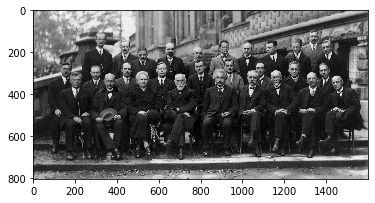

In [3]:
plt.imshow(solvay, cmap='gray')

In [4]:
face_cascade = cv2.CascadeClassifier('Computer-Vision-with-Python/DATA/haarcascades/haarcascade_frontalface_default.xml')

In [5]:
def detect_face(img):
    
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w, y+h), (255, 255, 255), 10)
        
    return face_img

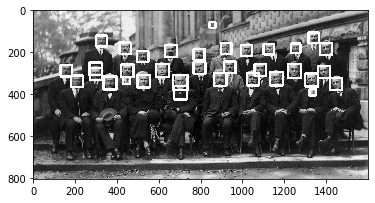

In [6]:
result = detect_face(solvay)
plt.imshow(result, cmap='gray')

In [7]:
def adjusted_detect_face(img):
    
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=4)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w, y+h), (255, 255, 255), 10)
        
    return face_img

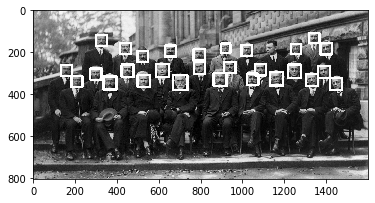

In [8]:
result = adjusted_detect_face(solvay)
plt.imshow(result, cmap='gray')

In [9]:
# EYE CASCADE FILE
eye_cascade = cv2.CascadeClassifier('Computer-Vision-with-Python/DATA/haarcascades/haarcascade_eye.xml')

In [10]:
def detect_eyes(img):
    
    face_img = img.copy()
    
    eye_rects = eye_cascade.detectMultiScale(face_img,  scaleFactor=1.2, minNeighbors=4)
    
    for (x,y,w,h) in eye_rects:
        cv2.rectangle(face_img,(x,y),(x+w, y+h), (255, 255, 255), 10)
        
    return face_img

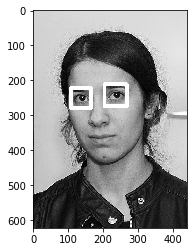

In [11]:
result = detect_eyes(nadia)
plt.imshow(result, cmap='gray')

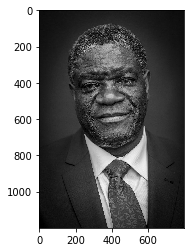

In [12]:
result = detect_eyes(denis)
plt.imshow(result, cmap='gray') 
# it doesnt find the eyes of denis because of the editting that makes them
# darker

In [13]:
# CAPTURING FACES IN VIDEO
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read(0)
    
    frame = detect_face(frame)
    
    cv2.imshow('Video Face Detect', frame)
    
    k = cv2.waitKey(1)
    
    if k == 27:
        break
        
        
cap.release()
cv2.destroyAllWindows()